File CSV yang ditemukan: ['features_svm_ready.csv', 'expanded_proportional.csv']
Label yang ditemukan: [ 0  1 10]


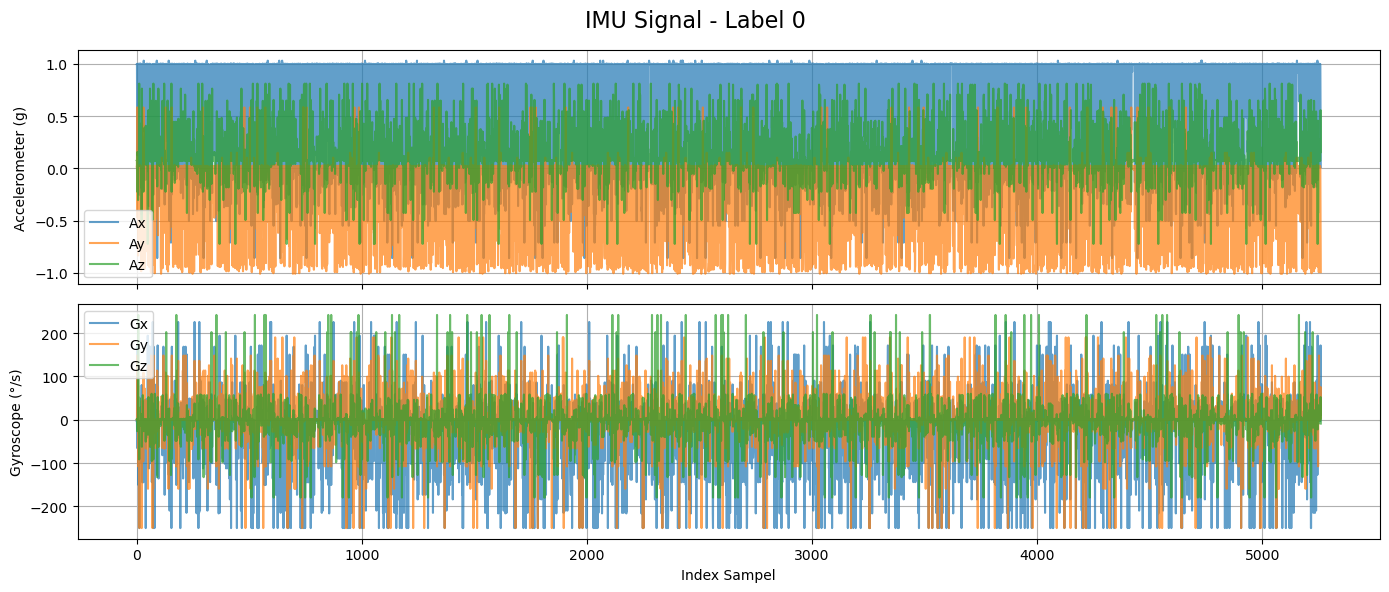

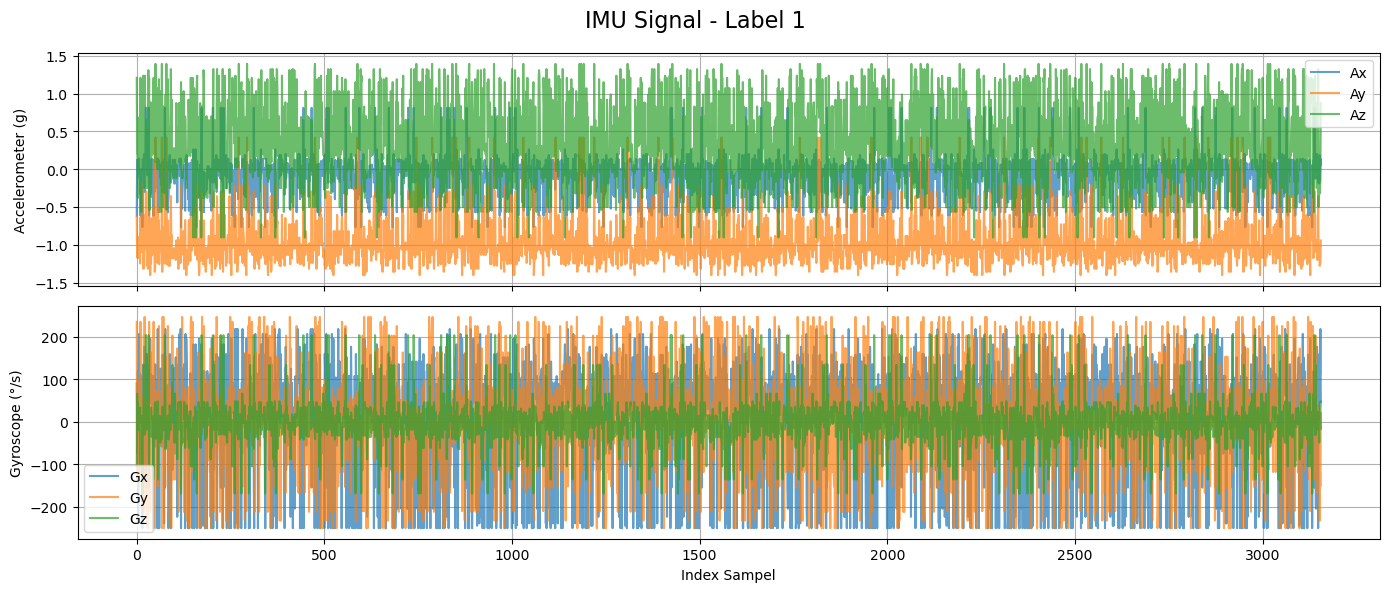

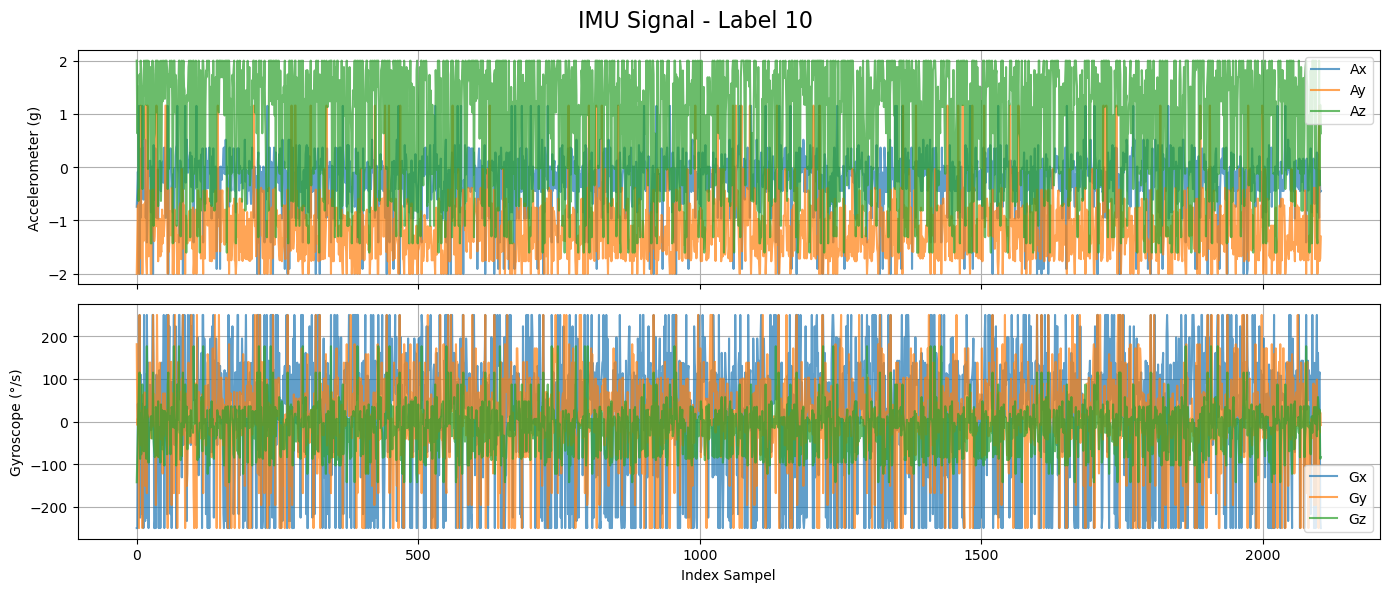

In [1]:
### Visualisasi data IMU
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import glob
print("File CSV yang ditemukan:", glob.glob("*.csv"))


# Baca file CSV
df = pd.read_csv("expanded_proportional.csv")

# Tampilkan label unik
print("Label yang ditemukan:", df['label'].unique())

# Loop visualisasi per label
for label in sorted(df['label'].unique()):
    subset = df[df['label'] == label].reset_index(drop=True)

    fig, axs = plt.subplots(2, 1, figsize=(14, 6), sharex=True)
    fig.suptitle(f'IMU Signal - Label {label}', fontsize=16)

    # Akselerometer
    axs[0].plot(subset['ax'], label='Ax', alpha=0.7)
    axs[0].plot(subset['ay'], label='Ay', alpha=0.7)
    axs[0].plot(subset['az'], label='Az', alpha=0.7)
    axs[0].set_ylabel('Accelerometer (g)')
    axs[0].legend()
    axs[0].grid(True)

    # Gyroscope
    axs[1].plot(subset['gx'], label='Gx', alpha=0.7)
    axs[1].plot(subset['gy'], label='Gy', alpha=0.7)
    axs[1].plot(subset['gz'], label='Gz', alpha=0.7)
    axs[1].set_ylabel('Gyroscope (°/s)')
    axs[1].set_xlabel('Index Sampel')
    axs[1].legend()
    axs[1].grid(True)
    # Tampilkan grafiknya
    plt.tight_layout()
    plt.show()

In [2]:
import matplotlib.pyplot as plt

def plot_imu_combined(subset, save_path="imu_visual.png"):
    fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

    # Akselerometer
    axs[0].plot(subset['ax'], label='Ax', alpha=0.7)
    axs[0].plot(subset['ay'], label='Ay', alpha=0.7)
    axs[0].plot(subset['az'], label='Az', alpha=0.7)
    axs[0].set_ylabel('Accelerometer (g)')
    axs[0].set_title('Sinyal Akselerometer')
    axs[0].legend()
    axs[0].grid(True)

    # Gyroscope
    axs[1].plot(subset['gx'], label='Gx', alpha=0.7)
    axs[1].plot(subset['gy'], label='Gy', alpha=0.7)
    axs[1].plot(subset['gz'], label='Gz', alpha=0.7)
    axs[1].set_ylabel('Gyroscope (°/s)')
    axs[1].set_xlabel('Index Sampel')
    axs[1].set_title('Sinyal Gyroscope')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    print(f"📸 Grafik berhasil disimpan ke: {save_path}")
    plt.show()


Gambar disimpan sebagai: imu_2color_labels_axes.png


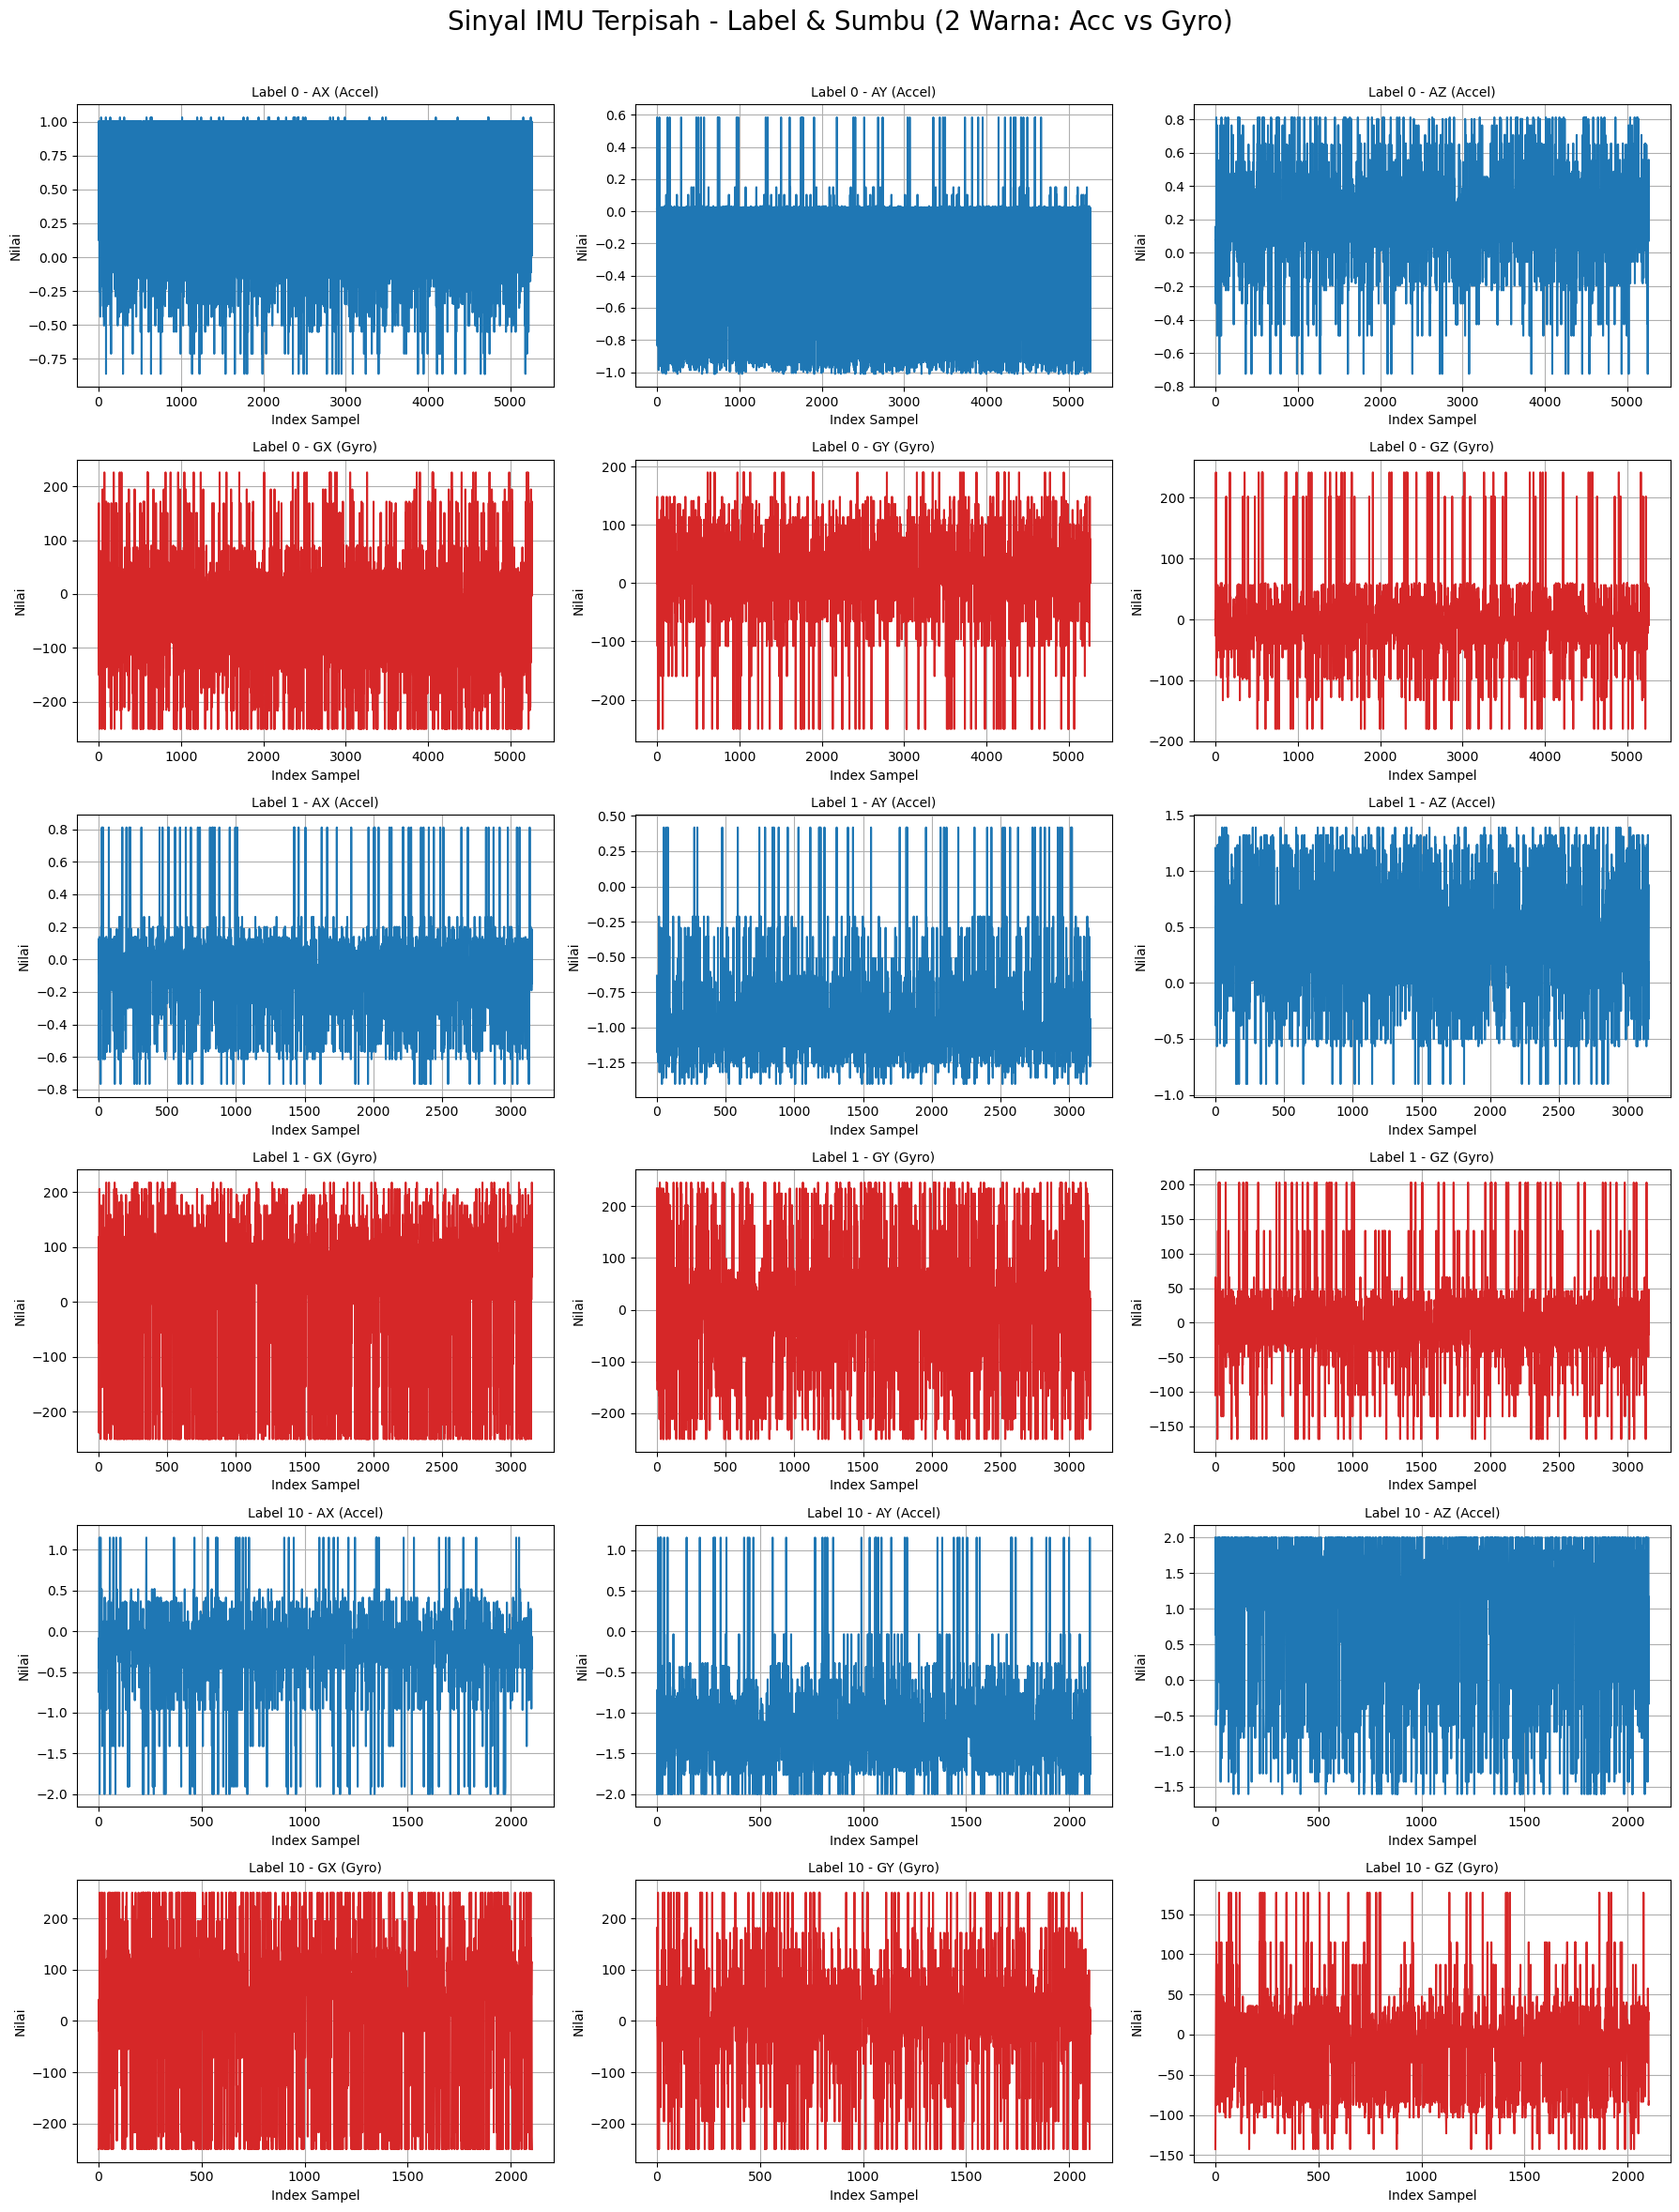

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Load data
df = pd.read_csv("expanded_proportional.csv")
unique_labels = sorted(df['label'].unique())
axes_acc = ['ax', 'ay', 'az']
axes_gyro = ['gx', 'gy', 'gz']
total_plots = len(unique_labels) * (len(axes_acc) + len(axes_gyro))

# Definisi warna
acc_color = 'tab:blue'
gyro_color = 'tab:red'

# Buat grid subplot
cols = 3
rows = total_plots // cols + (total_plots % cols != 0)
fig, axs = plt.subplots(rows, cols, figsize=(18, 4 * rows))
fig.suptitle("Sinyal IMU Terpisah - Label & Sumbu (2 Warna: Acc vs Gyro)", fontsize=20)
axs = axs.flatten()

plot_idx = 0
for label in unique_labels:
    subset = df[df['label'] == label].reset_index(drop=True)

    for axis in axes_acc:
        axs[plot_idx].plot(subset[axis], color=acc_color)
        axs[plot_idx].set_title(f'Label {label} - {axis.upper()} (Accel)', fontsize=10)
        axs[plot_idx].set_xlabel('Index Sampel')
        axs[plot_idx].set_ylabel('Nilai')
        axs[plot_idx].grid(True)
        plot_idx += 1

    for axis in axes_gyro:
        axs[plot_idx].plot(subset[axis], color=gyro_color)
        axs[plot_idx].set_title(f'Label {label} - {axis.upper()} (Gyro)', fontsize=10)
        axs[plot_idx].set_xlabel('Index Sampel')
        axs[plot_idx].set_ylabel('Nilai')
        axs[plot_idx].grid(True)
        plot_idx += 1

# Kosongkan subplot sisa jika ada
for i in range(plot_idx, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("imu_2color_labels_axes.png", dpi=300)
print("Gambar disimpan sebagai: imu_2color_labels_axes.png")
plt.show()


📁 KDE image saved as: imu_kde_per_label_sumbu.png


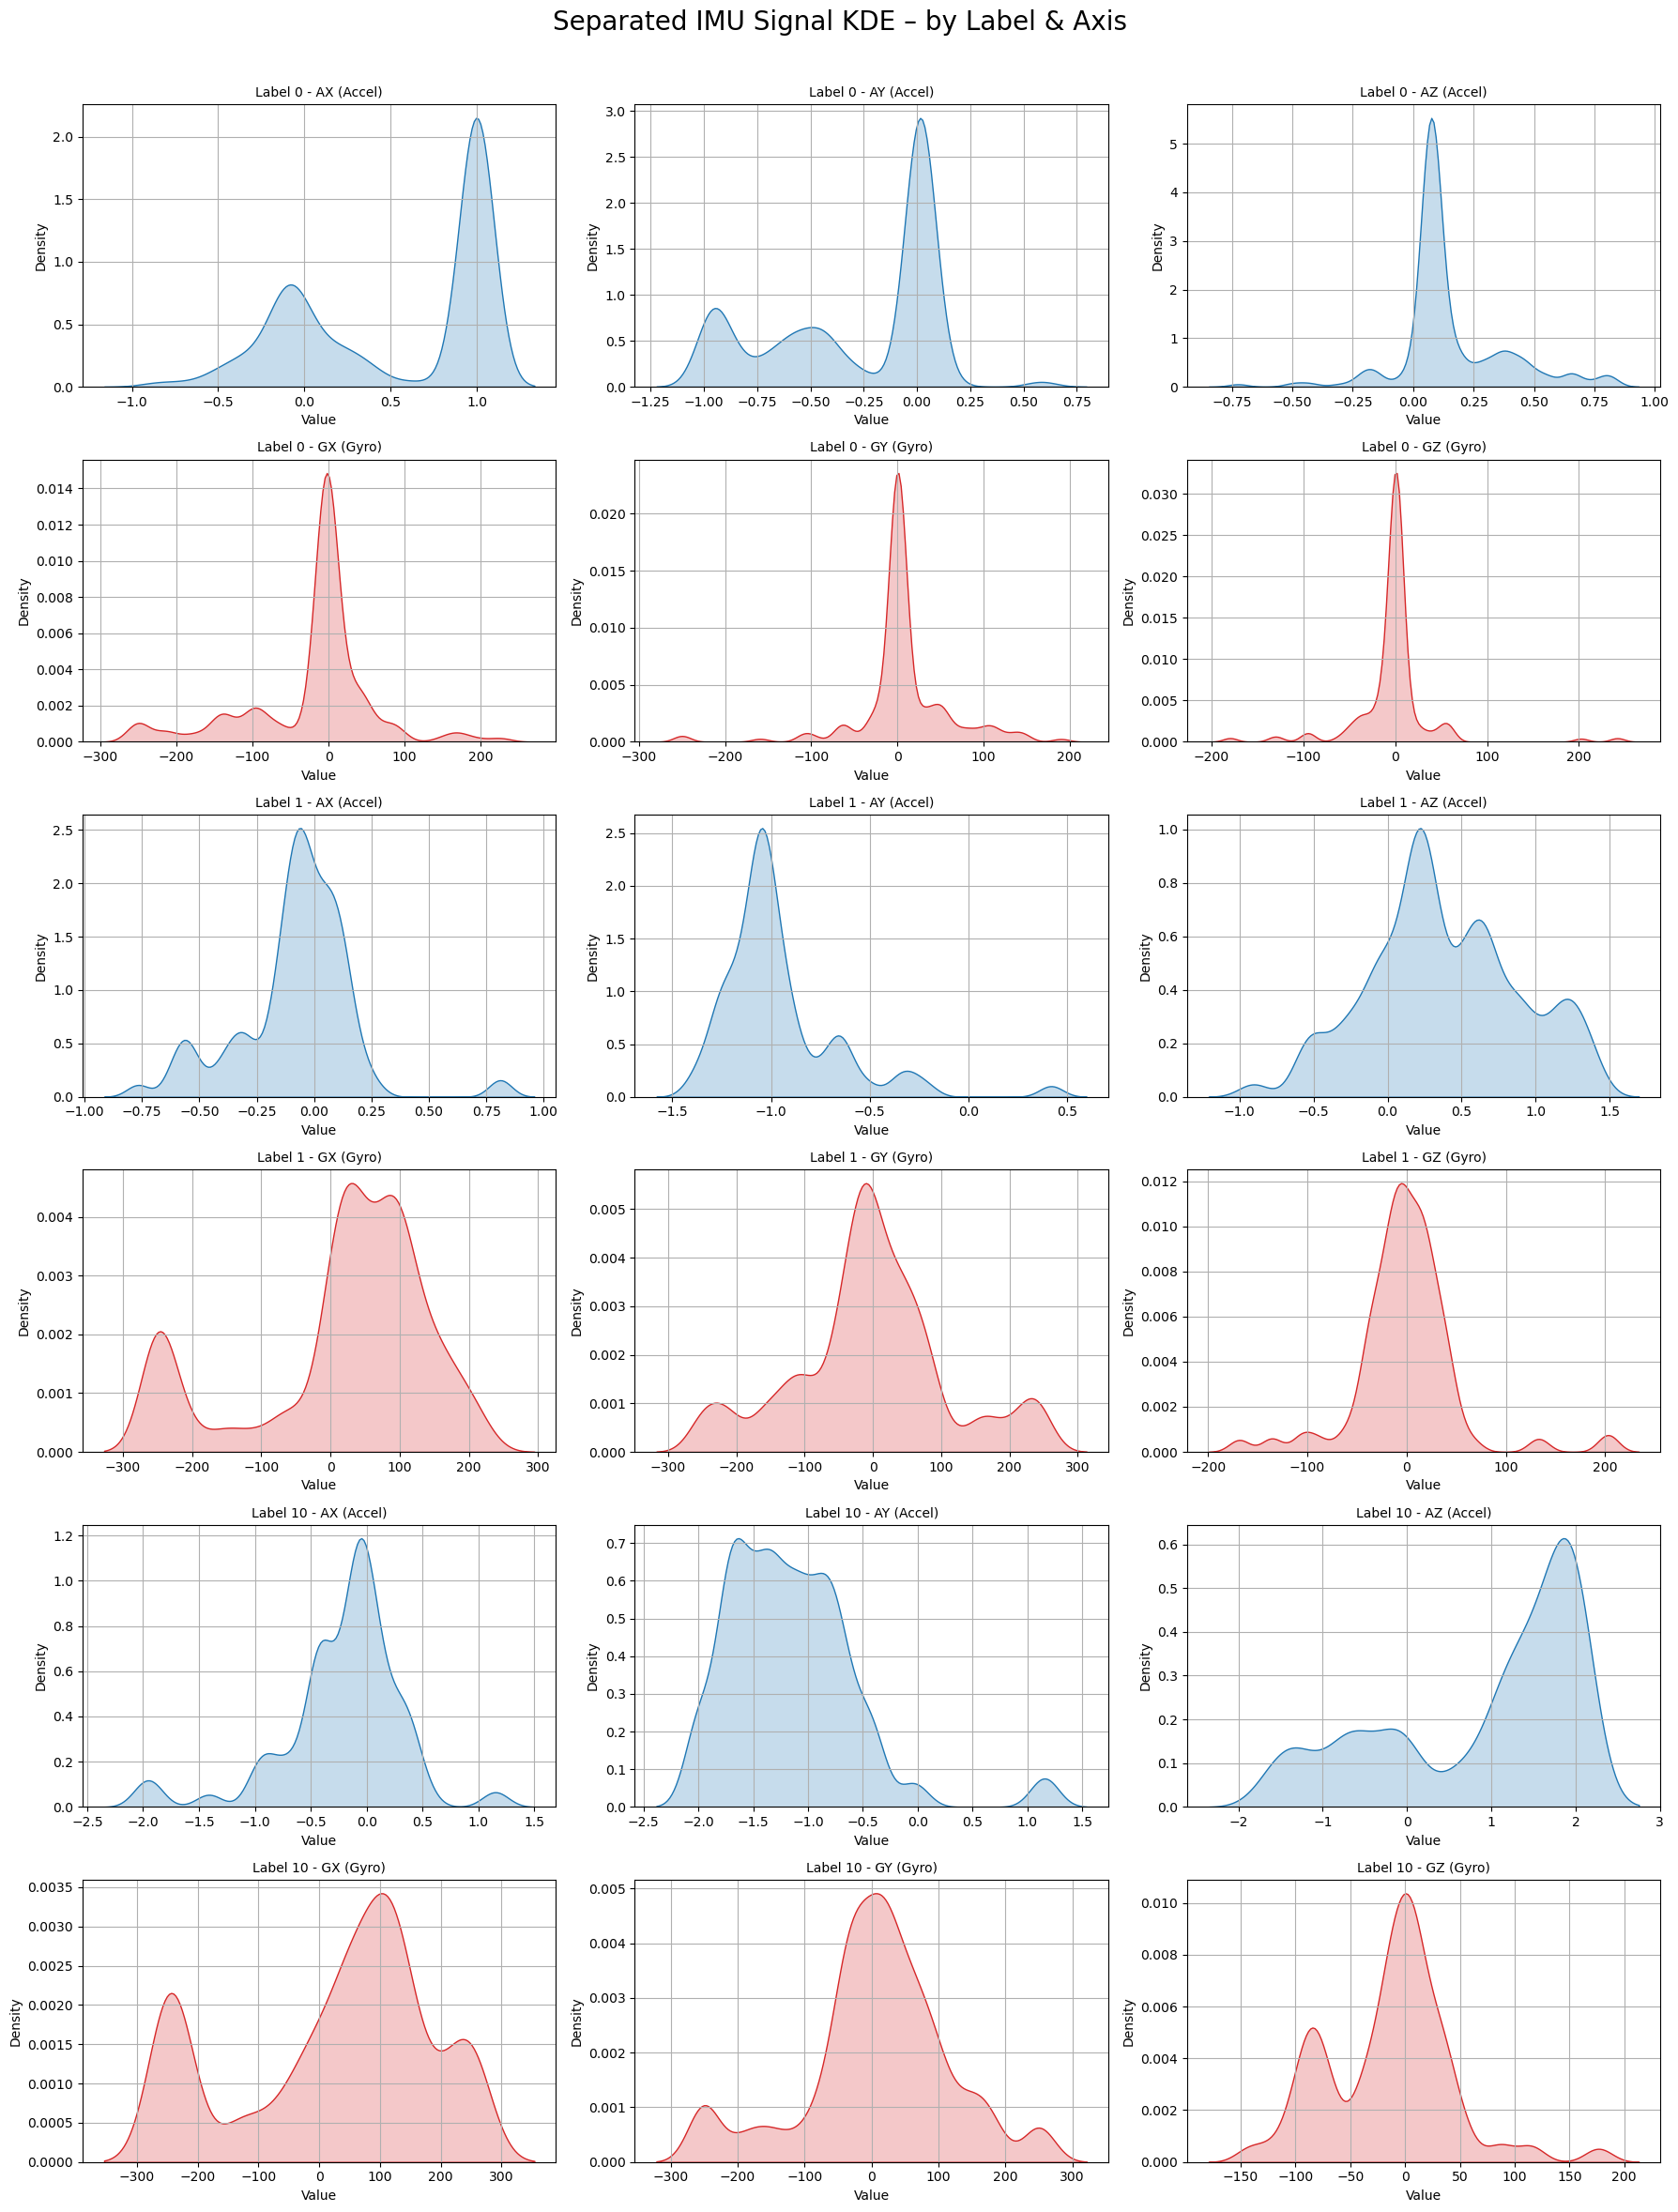

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("expanded_proportional.csv")
unique_labels = sorted(df['label'].unique())
axes_acc = ['ax', 'ay', 'az']
axes_gyro = ['gx', 'gy', 'gz']
total_plots = len(unique_labels) * (len(axes_acc) + len(axes_gyro))

# Define colors
acc_color = 'tab:blue'
gyro_color = 'tab:red'

# Setup subplot grid
cols = 3
rows = total_plots // cols + (total_plots % cols != 0)
fig, axs = plt.subplots(rows, cols, figsize=(18, 4 * rows))
fig.suptitle("Separated IMU Signal KDE – by Label & Axis", fontsize=20)
axs = axs.flatten()

plot_idx = 0
for label in unique_labels:
    subset = df[df['label'] == label].reset_index(drop=True)

    # KDE plot for accelerometer
    for axis in axes_acc:
        sns.kdeplot(data=subset, x=axis, ax=axs[plot_idx], color=acc_color, fill=True)
        axs[plot_idx].set_title(f'Label {label} - {axis.upper()} (Accel)', fontsize=10)
        axs[plot_idx].set_xlabel('Value')
        axs[plot_idx].set_ylabel('Density')
        axs[plot_idx].grid(True)
        plot_idx += 1

    # KDE plot for gyroscope
    for axis in axes_gyro:
        sns.kdeplot(data=subset, x=axis, ax=axs[plot_idx], color=gyro_color, fill=True)
        axs[plot_idx].set_title(f'Label {label} - {axis.upper()} (Gyro)', fontsize=10)
        axs[plot_idx].set_xlabel('Value')
        axs[plot_idx].set_ylabel('Density')
        axs[plot_idx].grid(True)
        plot_idx += 1

# Clear remaining subplots if any
for i in range(plot_idx, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("imu_kde_per_label_sumbu.png", dpi=300)
print("📁 KDE image saved as: imu_kde_per_label_sumbu.png")
plt.show()


In [5]:
import os

def export_all_label_tables(df, mode='csv', output_dir='exports'):
    os.makedirs(output_dir, exist_ok=True)

    if 'label' not in df.columns:
        raise ValueError("Kolom 'label' tidak ditemukan dalam dataframe.")

    for label in df['label'].unique():
        label_df = df[df['label'] == label].copy()
        filename_base = os.path.join(output_dir, f"label_{label}")

        if mode in ['csv', 'both']:
            label_df.to_csv(f"{filename_base}.csv", index=False)
        if mode in ['excel', 'both']:
            label_df.to_excel(f"{filename_base}.xlsx", index=False)

    print(f"✅ Data berhasil diekspor per-label ke folder '{output_dir}' dalam mode '{mode}'")

export_all_label_tables(df, mode='both')


✅ Data berhasil diekspor per-label ke folder 'exports' dalam mode 'both'


In [6]:
import matplotlib
matplotlib.use('Agg')  # Backend non-GUI untuk menyimpan file

def export_all_label_tables(df, mode='both', save_prefix='cuplikan_per_label'):
    import matplotlib.pyplot as plt

    all_samples = []
    for label in sorted(df['label'].unique()):
        sample = df[df['label'] == label][['ax', 'ay', 'az', 'gx', 'gy', 'gz']]
        sample = sample.head(5).copy()
        sample['label'] = label
        all_samples.append(sample)

    df_combined = pd.concat(all_samples, ignore_index=True)

    # ✅ Simpan sebagai PNG
    if mode in ['png', 'both']:
        fig, ax = plt.subplots(figsize=(12, max(2, len(df_combined) // 3)))
        ax.axis('off')
        tbl = ax.table(cellText=df_combined.values,
                       colLabels=df_combined.columns,
                       cellLoc='center',
                       loc='center')
        tbl.auto_set_font_size(False)
        tbl.set_fontsize(9)
        tbl.scale(1.2, 1.4)
        plt.title("Cuplikan Data IMU per Label (5 Baris)", fontsize=14)
        plt.tight_layout()
        plt.savefig(f"{save_prefix}.png", dpi=300)
        print(f"PNG disimpan sebagai: {save_prefix}.png")
        plt.close()

    # 📄 Simpan sebagai Tabel LaTeX
    if mode in ['latex', 'both']:
        latex_table = df_combined.to_latex(index=False, caption='Cuplikan Data IMU per Label (5 Baris)', label='tab:cuplikan_imu')

        with open(f"{save_prefix}.tex", "w", encoding="utf-8") as f:
            f.write("\\begin{table}[htbp]\n\\centering\n")
            f.write(latex_table)
            f.write("\\end{table}\n")
        
        print(f"LaTeX disimpan sebagai: {save_prefix}.tex")


In [7]:
export_all_label_tables(df, mode='both', save_prefix='cuplikan_per_label')


PNG disimpan sebagai: cuplikan_per_label.png
LaTeX disimpan sebagai: cuplikan_per_label.tex


In [8]:
#### Proses ekstract fitur FFT frekwensi dominan
import numpy as np
import pandas as pd
from scipy.stats import entropy
from scipy.fft import rfft

def extract_features(window):
    features = {}
    for axis in window.columns:
        signal = window[axis].values

        features[f'{axis}_mean'] = np.mean(signal)
        features[f'{axis}_std'] = np.std(signal)
        features[f'{axis}_max'] = np.max(signal)
        features[f'{axis}_min'] = np.min(signal)
        features[f'{axis}_energy'] = np.sum(signal**2)
        features[f'{axis}_entropy'] = entropy(np.histogram(signal, bins=20, density=True)[0] + 1e-8)

        # FFT: dominant frequency
        fft_vals = np.abs(rfft(signal))
        fft_freqs = np.fft.rfftfreq(len(signal), d=1)
        dom_freq = fft_freqs[np.argmax(fft_vals[1:]) + 1]  # skip DC
        features[f'{axis}_dominant_freq'] = dom_freq
    return features

def build_feature_dataframe_from_imu(df, fs=50, window_duration=2, stride_ratio=0.5):
    window_size = int(fs * window_duration)
    stride_size = int(window_size * stride_ratio)

    df = df.copy()
    df.columns = df.columns.str.strip().str.lower()

    data = []
    for start in range(0, len(df) - window_size + 1, stride_size):
        end = start + window_size
        window = df.iloc[start:end]
        if 'label' not in window.columns:
            continue

        label = window['label'].mode().values[0]
        window_data = window.drop(columns=['label'])

        feats = extract_features(window_data)
        feats['label'] = label
        data.append(feats)

    return pd.DataFrame(data)


In [9]:
### mulai FFT
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import rfft, rfftfreq

def plot_fft_single_window(window, fs=50, save_path="fft_output.png"):
    window = window.drop(columns=['label'], errors='ignore')
    sample_count = window.shape[0]
    time_vector = np.arange(sample_count) / fs

    plt.figure(figsize=(12, 4 * len(window.columns)))

    for i, axis in enumerate(window.columns):
        signal = window[axis].values
        fft_vals = np.abs(rfft(signal))
        fft_freqs = rfftfreq(sample_count, d=1/fs)

        plt.subplot(len(window.columns), 1, i + 1)
        plt.plot(fft_freqs, fft_vals, color='orange')
        plt.title(f"FFT - Axis {axis}")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Magnitude")
        plt.grid(True)

    plt.tight_layout()
    plt.savefig(save_path, dpi=300)  # Simpan ke PNG sebelum show
    print(f"FFT disimpan sebagai: {save_path}")
    plt.show()


FFT disimpan sebagai: fft_output.png


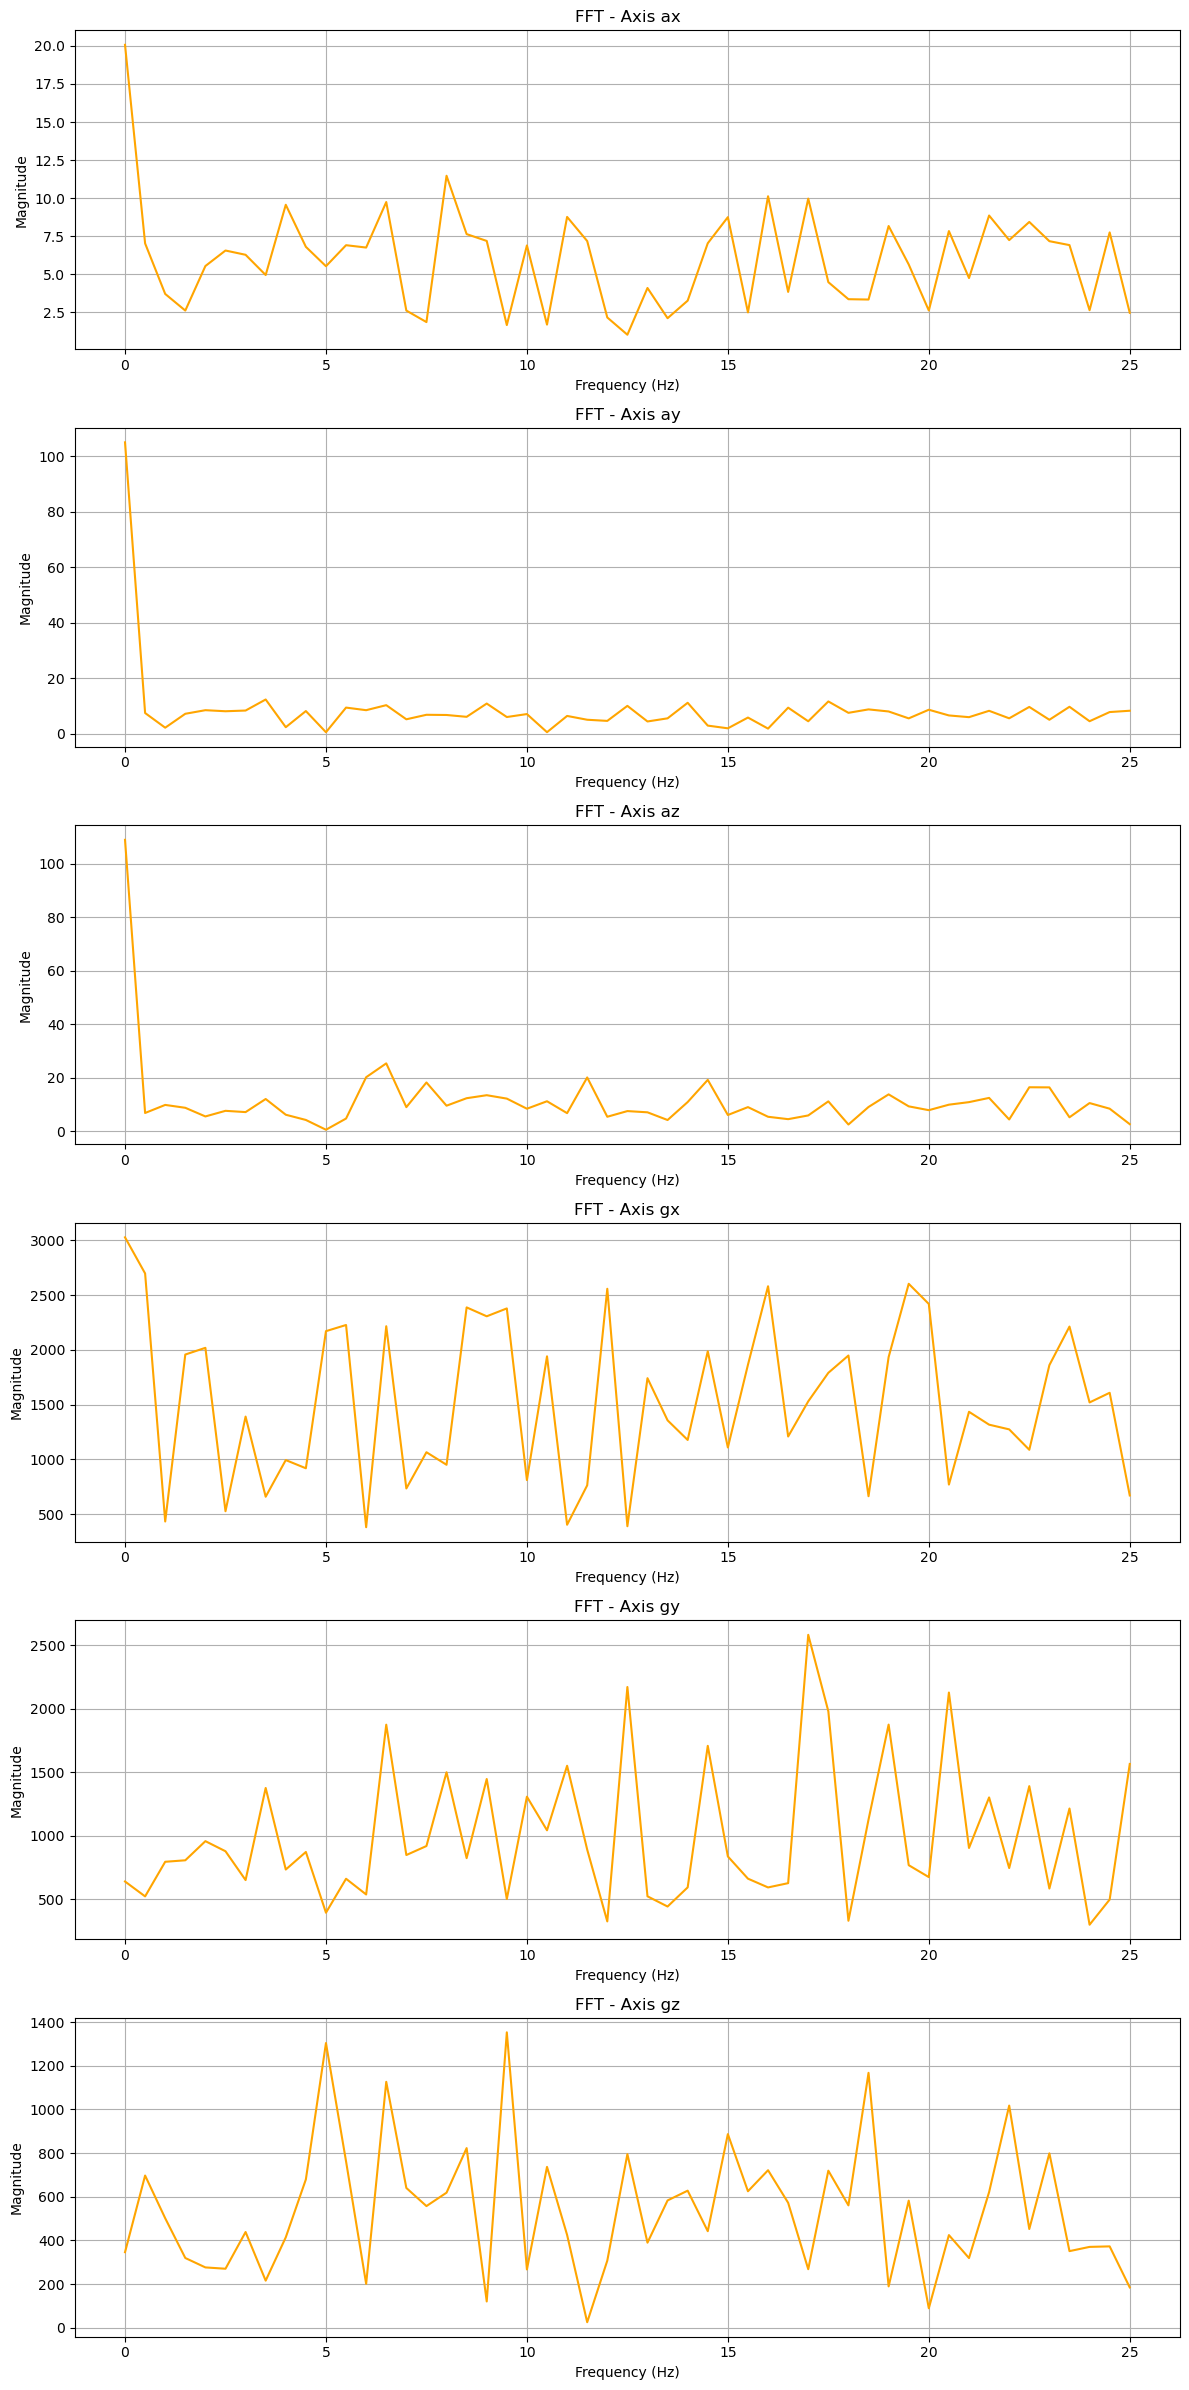

In [10]:
#### Mulai Visualkan FFT per sumbu
import pandas as pd
%matplotlib inline
df_raw = pd.read_csv("expanded_proportional.csv")  # Pastikan nama file sesuai dan path-nya benar
window_label_10 = df_raw[df_raw['label'] == 10].iloc[0:100]
plot_fft_single_window(window_label_10, fs=50)


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.fft import rfft, rfftfreq

def compare_fft_by_label(df_raw, fs=50, window_size=100, axis='ax', max_labels=3, save_path="fft_per_label.png"):
    unique_labels = df_raw['label'].value_counts().nlargest(max_labels).index

    plt.figure(figsize=(10, 4 * len(unique_labels)))
    for i, label in enumerate(unique_labels):
        df_label = df_raw[df_raw['label'] == label]
        window = df_label.iloc[:window_size]
        signal = window[axis].values

        fft_vals = np.abs(rfft(signal))
        fft_freqs = rfftfreq(len(signal), d=1/fs)

        plt.subplot(len(unique_labels), 1, i + 1)
        plt.plot(fft_freqs, fft_vals, label=f'Label {label}', color='teal')
        plt.title(f'FFT Axis {axis} - Label {label}')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Magnitude')
        plt.grid(True)
        plt.legend()

    plt.tight_layout()
    plt.savefig(save_path, dpi=300)  # Simpan sebelum tampilkan
    print(f"Gambar FFT per label disimpan sebagai: {save_path}")
    plt.show()


Gambar FFT per label disimpan sebagai: fft_ax_per_label.png


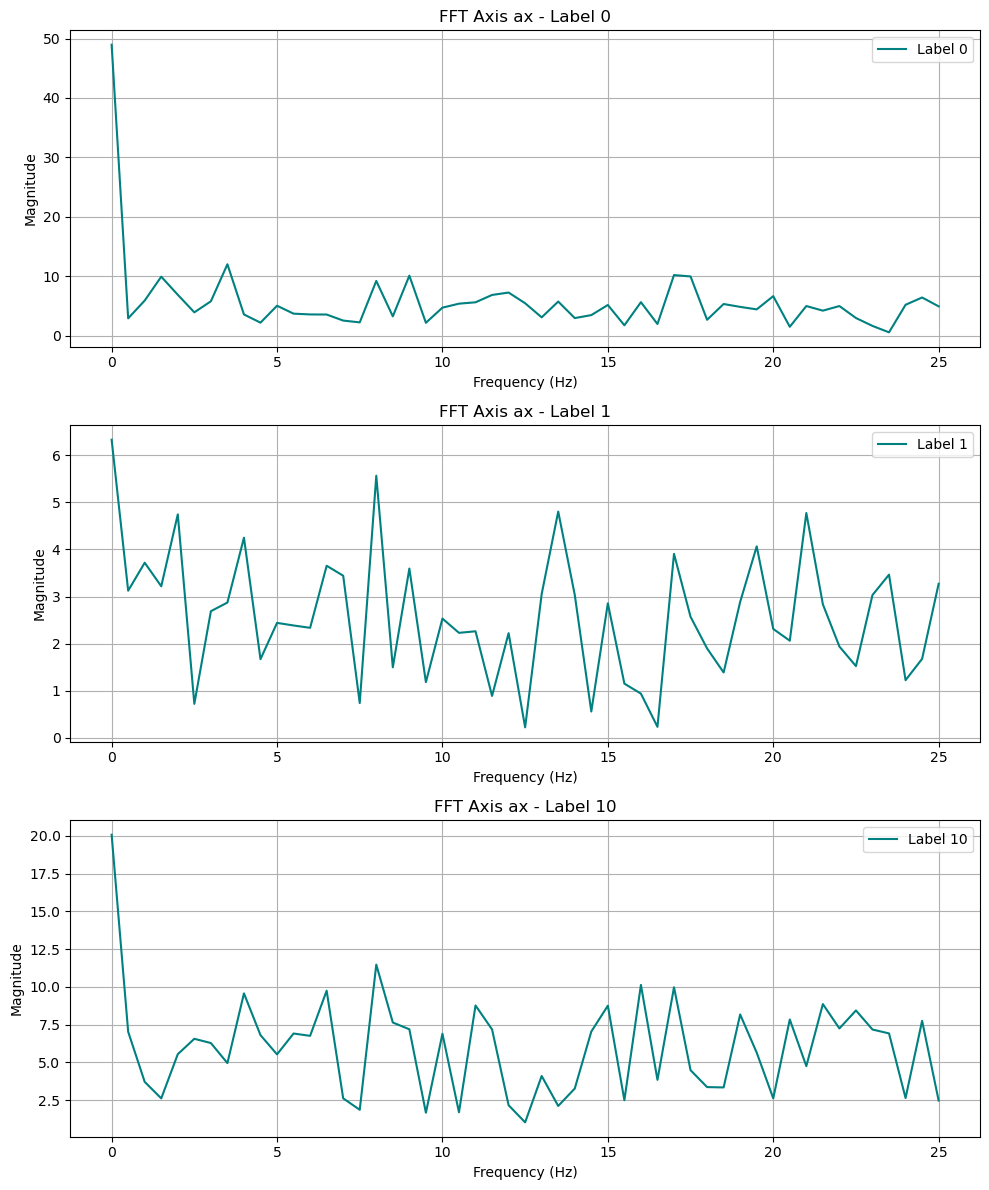

In [12]:
### Mulai Visualisasi per label FFT
compare_fft_by_label(df_raw, fs=50, axis='ax', window_size=100, max_labels=5,
save_path="fft_ax_per_label.png")



In [13]:
print(df_raw.columns.tolist())


['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'label']


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.fft import rfft, rfftfreq

def plot_fft_comparison_single_frame(df_raw, fs=50, window_size=100, axis='Ax', max_labels=3, save_path="fft_single_frame.png"):
    """
    Visualisasi spektrum FFT dari beberapa label dalam 1 frame grafik dan menyimpannya ke PNG
    """
    unique_labels = df_raw['label'].value_counts().nlargest(max_labels).index
    fft_freqs = None
    plt.figure(figsize=(8, 5))

    for label in unique_labels:
        df_label = df_raw[df_raw['label'] == label]
        window = df_label.iloc[:window_size]

        if axis not in window.columns:
            print(f"Kolom '{axis}' tidak ditemukan di window label {label}. Skip.")
            continue

        signal = window[axis].values
        fft_vals = np.abs(rfft(signal))
        fft_freqs = rfftfreq(len(signal), d=1/fs)

        plt.plot(fft_freqs, fft_vals, label=f'Label {label}', linewidth=2)

    plt.title(f"Spectrum FFT Axis '{axis}' per Label")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    print(f"Gambar disimpan sebagai: {save_path}")
    plt.show()
    plt.close()


Gambar disimpan sebagai: fft_ax_labels_frame.png


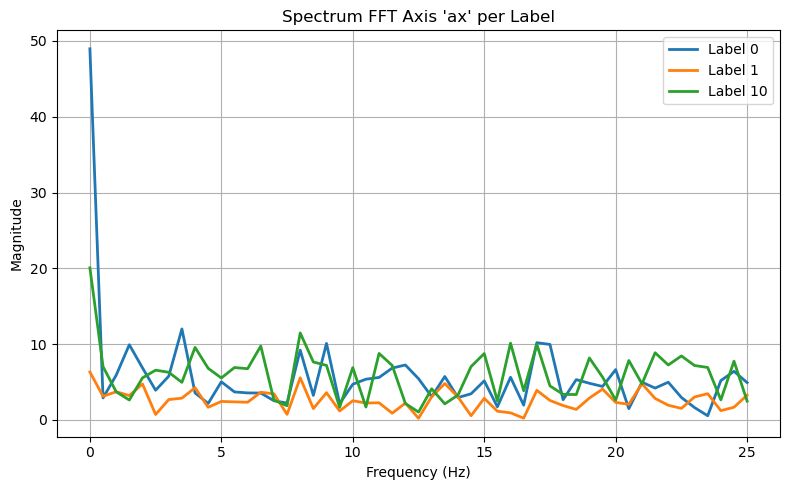

In [15]:
plot_fft_comparison_single_frame(df_raw, fs=50, window_size=100, axis='ax', max_labels=5,
save_path="fft_ax_labels_frame.png")
plt.show()


In [16]:
### pembuatan features_df
import pandas as pd

# Baca data
df_raw = pd.read_csv("expanded_proportional.csv")

# Ekstraksi fitur lengkap
features_df = build_feature_dataframe_from_imu(df_raw, fs=50, window_duration=0.5
, stride_ratio=0.5)

# Cek hasil
print(f"{features_df.shape[0]} window berhasil diolah.")
print("Distribusi label per window:")
print(features_df['label'].value_counts())


875 window berhasil diolah.
Distribusi label per window:
label
0     754
1     104
10     17
Name: count, dtype: int64


In [17]:
features_df.to_csv("features_svm_ready.csv", index=False)


/var/folders/3r/1w1nlmgs139cfps6qq58s40w0000gn/T/ipykernel_4798/2662582036.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=features_df, x='label', palette='Set2')


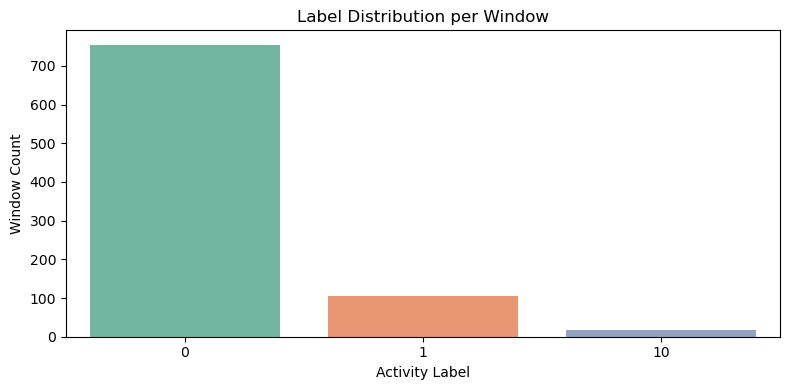

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(8, 4))
sns.countplot(data=features_df, x='label', palette='Set2')
plt.title("Label Distribution per Window")
plt.xlabel("Activity Label")
plt.ylabel("Window Count")
plt.tight_layout()

# 💾 Save plot as PNG file
plt.savefig("label_distribution.png", dpi=300)

# Tampilkan gambar langsung
plt.show()


Image saved as: feature_correlation.png


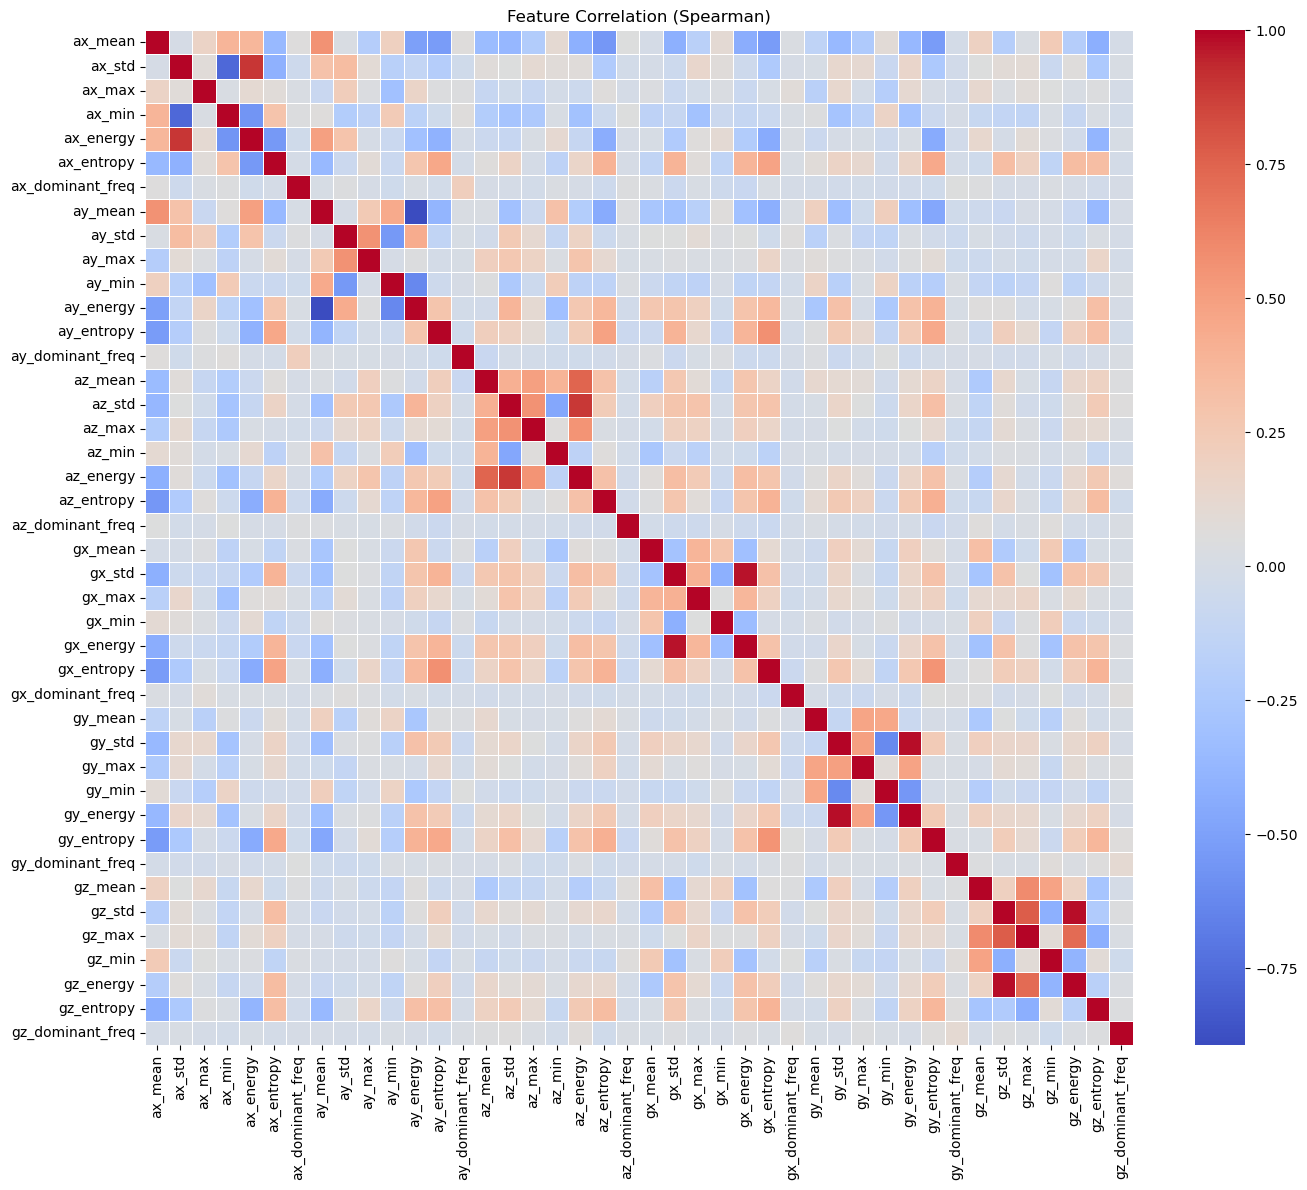

In [19]:
# Numerical features only (drop 'label' column for correlation)
corr = features_df.drop(columns=['label']).corr()

plt.figure(figsize=(14,12))
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Feature Correlation (Spearman)")
plt.tight_layout()

plt.savefig("feature_correlation.png", dpi=300)  # Save it first!
print("Image saved as: feature_correlation.png")
plt.show()  # Then display it
plt.close()  # Close the figure to avoid conflicts with the next plot

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# 🔍 Load fitur dari file CSV
features_df = pd.read_csv("features_svm_ready.csv")

# 🎯 Pisahkan fitur dan label
X = features_df.drop(columns='label').values
y = features_df['label'].values

# 🔧 Scaling fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🎲 Split data (non-stratified karena distribusi tidak seimbang)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🚀 Model SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# 📊 Evaluasi
print("📌 SVM Model")
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


📌 SVM Model
Akurasi: 0.8171428571428572
Confusion Matrix:
 [[128  16   3]
 [ 13  14   0]
 [  0   0   1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       147
           1       0.47      0.52      0.49        27
          10       0.25      1.00      0.40         1

    accuracy                           0.82       175
   macro avg       0.54      0.80      0.59       175
weighted avg       0.84      0.82      0.82       175



In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
import pandas as pd

# 🔍 Load data
features_df = pd.read_csv("features_svm_ready.csv")
X = features_df.drop(columns='label').values
y = features_df['label'].values

# 📊 Feature Selection using ANOVA (Select top k features)
selector = SelectKBest(score_func=f_classif, k=20)  # Adjust 'k' based on experiment
X_selected = selector.fit_transform(X, y)

# 🔧 Scale the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# 🚧 Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🧮 PSO objective function (accuracy)
def evaluate_particle(params):
    C, gamma = params
    C = max(C, 0.001)
    gamma = max(gamma, 0.0001)

    model = SVC(kernel='rbf', C=C, gamma=gamma, class_weight='balanced')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return -accuracy_score(y_test, y_pred)

# 🚀 PSO optimization loop
def pso_optimize(n_particles=10, n_iterations=30):
    np.random.seed(42)
    particles = np.random.uniform([0.1, 0.0001], [10, 1], size=(n_particles, 2))
    velocities = np.zeros_like(particles)
    personal_best = particles.copy()
    personal_best_scores = np.array([evaluate_particle(p) for p in particles])

    global_best_idx = np.argmin(personal_best_scores)
    global_best = personal_best[global_best_idx]

    w, c1, c2 = 0.7, 1.4, 1.4

    for i in range(n_iterations):
        for j in range(n_particles):
            r1, r2 = np.random.rand(), np.random.rand()
            velocities[j] = (w * velocities[j] +
                             c1 * r1 * (personal_best[j] - particles[j]) +
                             c2 * r2 * (global_best - particles[j]))
            particles[j] += velocities[j]

            score = evaluate_particle(particles[j])
            if score < personal_best_scores[j]:
                personal_best[j] = particles[j]
                personal_best_scores[j] = score

        global_best_idx = np.argmin(personal_best_scores)
        global_best = personal_best[global_best_idx]

    return global_best

# ⚡ Run PSO to optimize SVM hyperparameters
best_params = pso_optimize()
best_C, best_gamma = best_params
print(f"✅ Best C: {best_C:.4f}, Best gamma: {best_gamma:.6f}")


✅ Best C: 8.5332, Best gamma: 0.068919


In [22]:
svm_pso = SVC(kernel='rbf', C=best_C, gamma=best_gamma, class_weight='balanced')
svm_pso.fit(X_train, y_train)
y_pred_pso = svm_pso.predict(X_test)

# 📊 Evaluasi
from sklearn.metrics import confusion_matrix, classification_report

print("📌 SVM + PSO")
print("Akurasi:", accuracy_score(y_test, y_pred_pso))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_pso))
print("Classification Report:\n", classification_report(y_test, y_pred_pso))


📌 SVM + PSO
Akurasi: 0.8457142857142858
Confusion Matrix:
 [[139   8   0]
 [ 18   9   0]
 [  1   0   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       147
           1       0.53      0.33      0.41        27
          10       0.00      0.00      0.00         1

    accuracy                           0.85       175
   macro avg       0.47      0.43      0.44       175
weighted avg       0.82      0.85      0.83       175



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
import pandas as pd

# 🔍 Load data
features_df = pd.read_csv("features_svm_ready.csv")
X = features_df.drop(columns='label').values
y = features_df['label'].values

# 📊 Feature Selection using ANOVA
selector = SelectKBest(score_func=f_classif, k=20)
X_selected = selector.fit_transform(X, y)

# 🔧 Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# 🚧 Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🎯 Baseline SVM with default parameters
svm_default = SVC(kernel='rbf', class_weight='balanced')
svm_default.fit(X_train, y_train)
y_pred_default = svm_default.predict(X_test)
acc_default = accuracy_score(y_test, y_pred_default)
print(f"📉 Default SVM Accuracy: {acc_default:.4f}")
print(classification_report(y_test, y_pred_default))

# 🧮 Objective function for PSO
def evaluate_particle(params):
    C, gamma = params
    C = max(C, 0.001)
    gamma = max(gamma, 0.0001)

    model = SVC(kernel='rbf', C=C, gamma=gamma, class_weight='balanced')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return -accuracy_score(y_test, y_pred)

# 🚀 PSO Optimization
def pso_optimize(n_particles=10, n_iterations=30):
    np.random.seed(42)
    particles = np.random.uniform([0.1, 0.0001], [10, 1], size=(n_particles, 2))
    velocities = np.zeros_like(particles)
    personal_best = particles.copy()
    personal_best_scores = np.array([evaluate_particle(p) for p in particles])

    global_best_idx = np.argmin(personal_best_scores)
    global_best = personal_best[global_best_idx]

    w, c1, c2 = 0.7, 1.4, 1.4

    for i in range(n_iterations):
        for j in range(n_particles):
            r1, r2 = np.random.rand(), np.random.rand()
            velocities[j] = (w * velocities[j] +
                             c1 * r1 * (personal_best[j] - particles[j]) +
                             c2 * r2 * (global_best - particles[j]))
            particles[j] += velocities[j]

            score = evaluate_particle(particles[j])
            if score < personal_best_scores[j]:
                personal_best[j] = particles[j]
                personal_best_scores[j] = score

        global_best_idx = np.argmin(personal_best_scores)
        global_best = personal_best[global_best_idx]

    return global_best

# ⚡ Apply PSO to optimize SVM
best_params = pso_optimize()
best_C, best_gamma = best_params
print(f"✅ Best C: {best_C:.4f}, Best gamma: {best_gamma:.6f}")

# 📈 Train & Evaluate Optimized SVM
svm_pso = SVC(kernel='rbf', C=best_C, gamma=best_gamma, class_weight='balanced')
svm_pso.fit(X_train, y_train)
y_pred_pso = svm_pso.predict(X_test)
acc_pso = accuracy_score(y_test, y_pred_pso)
print(f"🚀 PSO-Optimized SVM Accuracy: {acc_pso:.4f}")
print(classification_report(y_test, y_pred_pso))


📉 Default SVM Accuracy: 0.8286
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       147
           1       0.50      0.70      0.58        27
          10       0.25      1.00      0.40         1

    accuracy                           0.83       175
   macro avg       0.56      0.85      0.63       175
weighted avg       0.87      0.83      0.84       175

✅ Best C: 8.5332, Best gamma: 0.068919
🚀 PSO-Optimized SVM Accuracy: 0.8457
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       147
           1       0.53      0.33      0.41        27
          10       0.00      0.00      0.00         1

    accuracy                           0.85       175
   macro avg       0.47      0.43      0.44       175
weighted avg       0.82      0.85      0.83       175



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


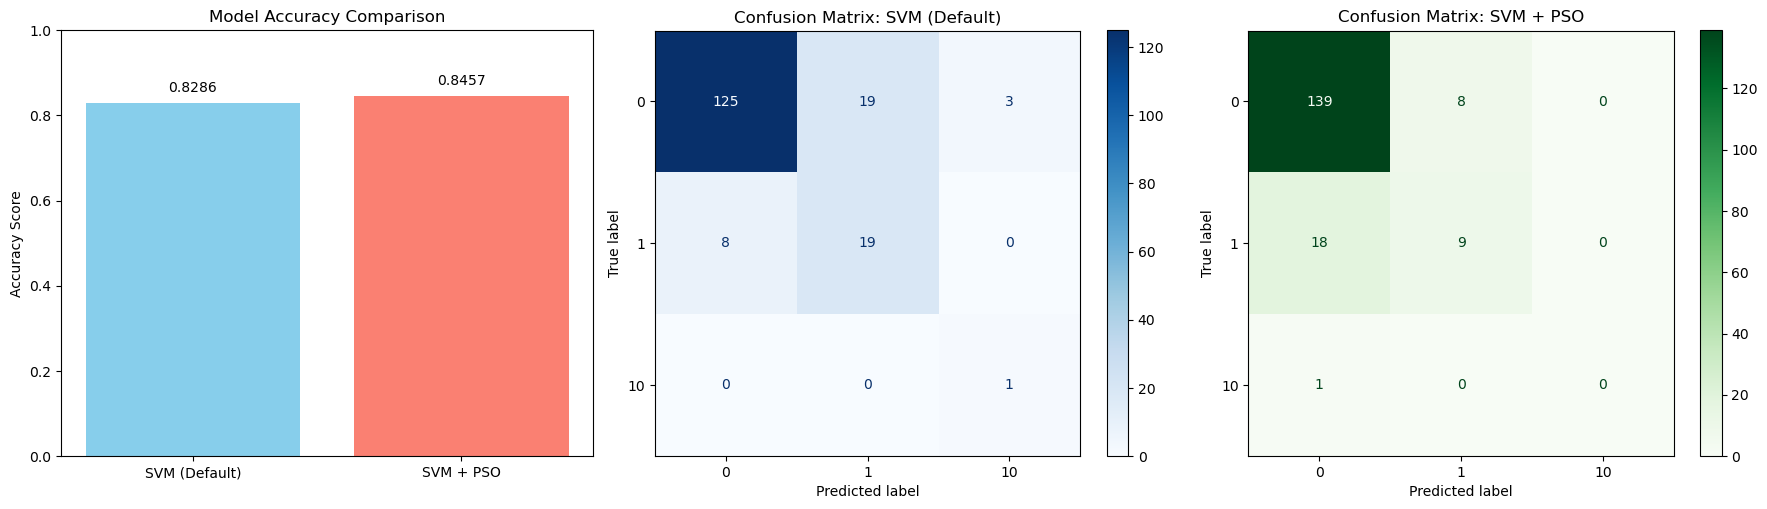

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 🔹 Accuracy bar plot
accuracies = [acc_default, acc_pso]
labels = ['SVM (Default)', 'SVM + PSO']
axes[0].bar(labels, accuracies, color=['skyblue', 'salmon'])
axes[0].set_title("Model Accuracy Comparison")
axes[0].set_ylabel("Accuracy Score")
axes[0].set_ylim(0, 1)
for i, acc in enumerate(accuracies):
    axes[0].text(i, acc + 0.02, f"{acc:.4f}", ha='center', va='bottom')

# 🔹 Confusion matrix: Default SVM
cm_default = confusion_matrix(y_test, y_pred_default)
disp_default = ConfusionMatrixDisplay(confusion_matrix=cm_default, display_labels=svm_default.classes_)
disp_default.plot(ax=axes[1], cmap='Blues')
axes[1].set_title("Confusion Matrix: SVM (Default)")

# 🔹 Confusion matrix: SVM + PSO
cm_pso = confusion_matrix(y_test, y_pred_pso)
disp_pso = ConfusionMatrixDisplay(confusion_matrix=cm_pso, display_labels=svm_pso.classes_)
disp_pso.plot(ax=axes[2], cmap='Greens')
axes[2].set_title("Confusion Matrix: SVM + PSO")

plt.tight_layout()
plt.show()



📉 Default SVM Accuracy: 0.8286
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       147
           1       0.50      0.70      0.58        27
          10       0.25      1.00      0.40         1

    accuracy                           0.83       175
   macro avg       0.56      0.85      0.63       175
weighted avg       0.87      0.83      0.84       175


✅ Best C: 8.5332, Best gamma: 0.068919

🚀 PSO-Optimized SVM Accuracy: 0.8457
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       147
           1       0.53      0.33      0.41        27
          10       0.00      0.00      0.00         1

    accuracy                           0.85       175
   macro avg       0.47      0.43      0.44       175
weighted avg       0.82      0.85      0.83       175


📊 Model Accuracy Comparison
        Model  Accuracy
SVM (Default)  0.828571
    SVM + PSO  0.845714

📘 Confusion Matrix: SVM (D

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


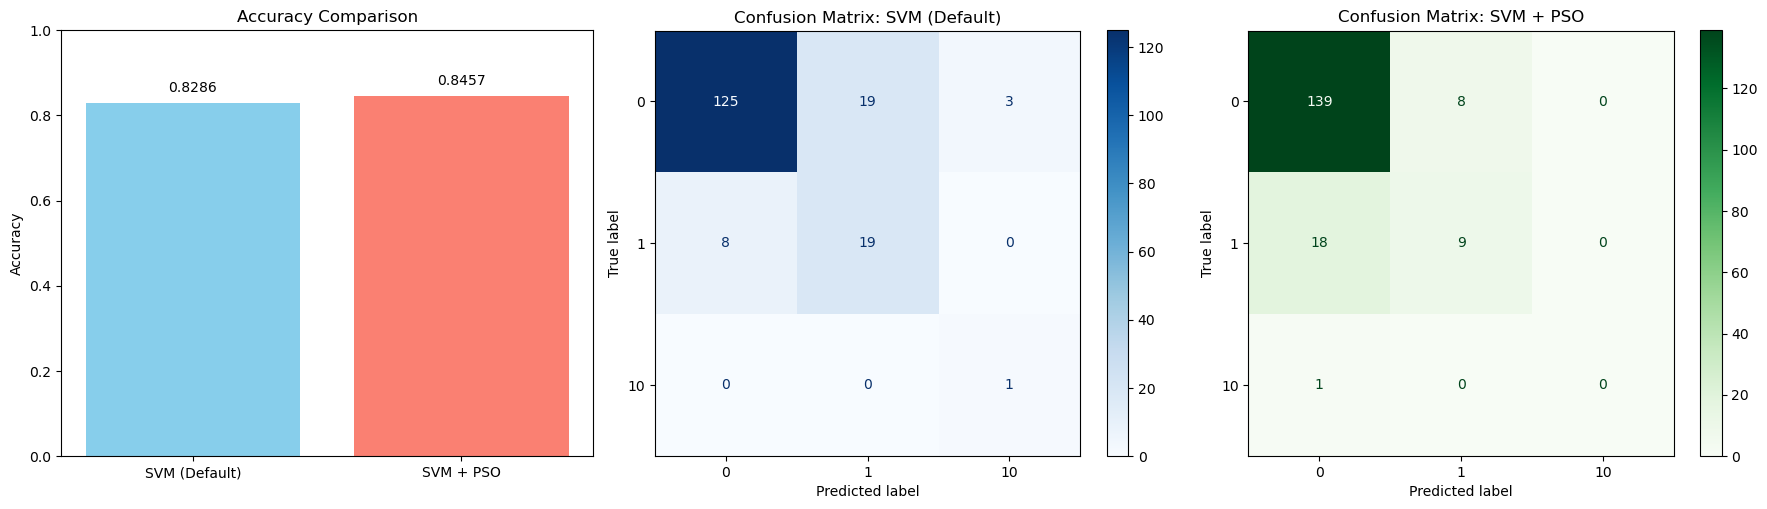

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# 🔹 Step 1: Load dan siapkan data
features_df = pd.read_csv("features_svm_ready.csv")
X = features_df.drop(columns='label').values
y = features_df['label'].values

# 🔹 Step 2: Feature Selection dengan ANOVA
selector = SelectKBest(score_func=f_classif, k=20)
X_selected = selector.fit_transform(X, y)

# 🔹 Step 3: Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# 🔹 Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 🔹 Step 5: Baseline SVM
svm_default = SVC(kernel='rbf', class_weight='balanced')
svm_default.fit(X_train, y_train)
y_pred_default = svm_default.predict(X_test)
acc_default = accuracy_score(y_test, y_pred_default)

print(f"\n📉 Default SVM Accuracy: {acc_default:.4f}")
print(classification_report(y_test, y_pred_default))

# 🔹 Step 6: PSO Optimization
def evaluate_particle(params):
    C, gamma = params
    C = max(C, 0.001)
    gamma = max(gamma, 0.0001)
    
    model = SVC(kernel='rbf', C=C, gamma=gamma, class_weight='balanced')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return -accuracy_score(y_test, y_pred)

def pso_optimize(n_particles=10, n_iterations=30):
    np.random.seed(42)
    particles = np.random.uniform([0.1, 0.0001], [10, 1], size=(n_particles, 2))
    velocities = np.zeros_like(particles)
    personal_best = particles.copy()
    personal_best_scores = np.array([evaluate_particle(p) for p in particles])
    
    global_best_idx = np.argmin(personal_best_scores)
    global_best = personal_best[global_best_idx]
    
    w, c1, c2 = 0.7, 1.4, 1.4
    
    for i in range(n_iterations):
        for j in range(n_particles):
            r1, r2 = np.random.rand(), np.random.rand()
            velocities[j] = (
                w * velocities[j] +
                c1 * r1 * (personal_best[j] - particles[j]) +
                c2 * r2 * (global_best - particles[j])
            )
            particles[j] += velocities[j]
            
            score = evaluate_particle(particles[j])
            if score < personal_best_scores[j]:
                personal_best[j] = particles[j]
                personal_best_scores[j] = score
        
        global_best_idx = np.argmin(personal_best_scores)
        global_best = personal_best[global_best_idx]
    
    return global_best

# 🔹 Step 7: Latih model dengan parameter terbaik hasil PSO
best_params = pso_optimize()
best_C, best_gamma = best_params
print(f"\n✅ Best C: {best_C:.4f}, Best gamma: {best_gamma:.6f}")

svm_pso = SVC(kernel='rbf', C=best_C, gamma=best_gamma, class_weight='balanced')
svm_pso.fit(X_train, y_train)
y_pred_pso = svm_pso.predict(X_test)
acc_pso = accuracy_score(y_test, y_pred_pso)

print(f"\n🚀 PSO-Optimized SVM Accuracy: {acc_pso:.4f}")
print(classification_report(y_test, y_pred_pso))

# 🔹 Step 8: Evaluasi dan visualisasi
cm_default = confusion_matrix(y_test, y_pred_default)
cm_pso = confusion_matrix(y_test, y_pred_pso)

# Tabel akurasi
accuracy_df = pd.DataFrame({
    "Model": ["SVM (Default)", "SVM + PSO"],
    "Accuracy": [acc_default, acc_pso]
})
print("\n📊 Model Accuracy Comparison")
print(accuracy_df.to_string(index=False))

# Tabel confusion matrix
print("\n📘 Confusion Matrix: SVM (Default)")
cm_default_df = pd.DataFrame(cm_default, index=svm_default.classes_, columns=svm_default.classes_)
print(cm_default_df.to_string())

print("\n💚 Confusion Matrix: SVM + PSO")
cm_pso_df = pd.DataFrame(cm_pso, index=svm_pso.classes_, columns=svm_pso.classes_)
print(cm_pso_df.to_string())

# Visualisasi grafik
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Bar plot accuracy
axes[0].bar(["SVM (Default)", "SVM + PSO"], [acc_default, acc_pso], color=["skyblue", "salmon"])
axes[0].set_title("Accuracy Comparison")
axes[0].set_ylabel("Accuracy")
axes[0].set_ylim(0, 1)
for i, acc in enumerate([acc_default, acc_pso]):
    axes[0].text(i, acc + 0.02, f"{acc:.4f}", ha='center', va='bottom')

# Confusion matrix plots
disp_default = ConfusionMatrixDisplay(confusion_matrix=cm_default, display_labels=svm_default.classes_)
disp_default.plot(ax=axes[1], cmap='Blues')
axes[1].set_title("Confusion Matrix: SVM (Default)")

disp_pso = ConfusionMatrixDisplay(confusion_matrix=cm_pso, display_labels=svm_pso.classes_)
disp_pso.plot(ax=axes[2], cmap='Greens')
axes[2].set_title("Confusion Matrix: SVM + PSO")

plt.tight_layout()
plt.show()


In [26]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_cv(model, X, y, n_splits=5):
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    acc_list, prec_list, rec_list, f1_list = [], [], [], []

    for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='macro')
        rec = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        acc_list.append(acc)
        prec_list.append(prec)
        rec_list.append(rec)
        f1_list.append(f1)

        print(f"Fold {fold} - Acc: {acc:.4f}, Prec: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")

    print("\n📊 Average CV Metrics")
    print(f"Accuracy : {np.mean(acc_list):.4f}")
    print(f"Precision: {np.mean(prec_list):.4f}")
    print(f"Recall   : {np.mean(rec_list):.4f}")
    print(f"F1-Score : {np.mean(f1_list):.4f}")

# 🔹 Evaluasi untuk SVM Default
print("\n🔹 Cross-Validation for Default SVM")
evaluate_cv(SVC(kernel='rbf', class_weight='balanced'), X_scaled, y)

# 🔹 Evaluasi untuk SVM dengan PSO
print("\n🔹 Cross-Validation for PSO-Optimized SVM")
evaluate_cv(SVC(kernel='rbf', C=best_C, gamma=best_gamma, class_weight='balanced'), X_scaled, y)



🔹 Cross-Validation for Default SVM
Fold 1 - Acc: 0.8171, Prec: 0.6259, Recall: 0.7795, F1: 0.6701
Fold 2 - Acc: 0.8343, Prec: 0.6241, Recall: 0.7451, F1: 0.6666
Fold 3 - Acc: 0.8171, Prec: 0.5949, Recall: 0.8474, F1: 0.6661
Fold 4 - Acc: 0.7200, Prec: 0.4044, Recall: 0.4806, F1: 0.4054
Fold 5 - Acc: 0.8000, Prec: 0.5277, Recall: 0.6106, F1: 0.5450

📊 Average CV Metrics
Accuracy : 0.7977
Precision: 0.5554
Recall   : 0.6926
F1-Score : 0.5906

🔹 Cross-Validation for PSO-Optimized SVM
Fold 1 - Acc: 0.8629, Prec: 0.6366, Recall: 0.5652, F1: 0.5944
Fold 2 - Acc: 0.8457, Prec: 0.7621, Recall: 0.5313, F1: 0.5903
Fold 3 - Acc: 0.8571, Prec: 0.7864, Recall: 0.5630, F1: 0.6190
Fold 4 - Acc: 0.7657, Prec: 0.3442, Recall: 0.3536, F1: 0.3481
Fold 5 - Acc: 0.8343, Prec: 0.4301, Recall: 0.4337, F1: 0.4317

📊 Average CV Metrics
Accuracy : 0.8331
Precision: 0.5919
Recall   : 0.4894
F1-Score : 0.5167


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
